In [1]:
import networkx as nx
import json
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt 
import gensim
import community
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

from IPython.display import display
from gensim import corpora, models
from string import punctuation
from nltk.corpus import stopwords
from datetime import datetime
from textblob import TextBlob  
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer as Vectorizer
from nltk  import TweetTokenizer
from gensim.models import CoherenceModel 
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import HdpModel
from networkx.algorithms.community import greedy_modularity_communities

# import pyLDAvis
# import matplotlib.pyplot as plt
# nltk.download('stopwords')
pd.set_option('display.max_colwidth', -1)


In [162]:
#VARIABLES:
english_stopwords = stopwords.words('english')
df =[]
#Variables para sentimentalAnalis()
popularidad_list = []
numeros_list = []
numero = 0 

#Variable for LDA AND HLDA
corpus = ""
elDictionary = ""
ldaResult = ""
modelLDA = ""
list_user_mentioned = dict()

In [163]:
#Metod para el sentimental Análisis y dibujar la grafica
def sentimentalAnalis(twitText):
    global numero, popularidad_list, numeros_list
    analisis = TextBlob(str(twitText))
    popularidad = analisis.sentiment
    popularidad = popularidad.polarity
    popularidad_list.append(popularidad)
    numeros_list.append(numero)
    numero = numero + 1 
    return popularidad


In [3]:
def clean_data_from_json(file,ntwits):
    # Load the first sheet of the JSON file into a data frame
    global df
    usernames = []
    sentimentOfTwritUser = []
    df = pd.read_json(file, orient='columns')
    df.to_csv('DataFrame.csv',encoding="utf-8")
    df = pd.read_csv('DataFrame.csv', encoding='utf-8')
    df = df[:ntwits]
    user_id = df['user'].tolist()
    twit = df['text'].tolist()
    for usr, twt in zip(user_id, twit):
        usernames.append(eval(str(usr))['screen_name'])
        sentimentOfTwritUser.append(sentimentalAnalis(twt))
    df=df.assign(screen_name=usernames)
    df=df.assign(sentiment=sentimentOfTwritUser)
    
    data = df['text'].tolist()

    return data

In [7]:
data = clean_data_from_json('P1THEDEMOCRATS_2000.json',10)
display(df)

,Unnamed: 0,_id,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,...,retweet_count,retweeted,retweeted_status,source,text,truncated,user,withheld_in_countries,screen_name,sentiment
0,0,5a5902b33b29c3bbcfe12224,{'coordinates': {}},2018-01-12 19:46:55,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nancyrutas', 'id': 532547274, 'name': 'Country Road Yall', 'id_str': '532547274', 'indices': [0, 11]}, {'screen_name': 'RepAlGreen', 'id': 156333623, 'name': 'Congressman Al Green', 'id_str': '156333623', 'indices': [12, 23]}, {'screen_name': 'TheDemocrats', 'id': 14377605, 'name': 'The Democrats', 'id_str': '14377605', 'indices': [24, 37]}], 'urls': [{'url': 'https://t.co/8cNFiiun3R', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140], 'expanded_url': 'https://twitter.com/i/web/status/951888237555044353'}], 'media': {}}",{'media': {}},0,False,{'coordinates': {}},951888237555043968,...,0,False,"{'metadata': {}, 'user': {'entities': {'url': {'urls': {}}, 'description': {'urls': {}}}, 'withheld_in_countries': {}}, 'entities': {'hashtags': {}, 'symbols': {}, 'user_mentions': {}, 'urls': {}, 'media': {}}, 'place': {'contained_within': {}, 'bounding_box': {'coordinates': {}}, 'attributes': {}}, 'extended_entities': {'media': {}}, 'quoted_status': {'metadata': {}, 'user': {'entities': {'url': {'urls': {}}, 'description': {'urls': {}}}}, 'entities': {'hashtags': {}, 'symbols': {}, 'user_mentions': {}, 'urls': {}, 'media': {}}, 'extended_entities': {'media': {}}}, 'withheld_in_countries': {}}","<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","@nancyrutas @RepAlGreen @TheDemocrats You got that right, I can not understand why they can't just see the daylight… https://t.co/8cNFiiun3R",True,"{'screen_name': 'daby0729', 'id': 4786002020, 'name': 'Daby', 'profile_sidebar_border_color': '000000', 'contributors_enabled': False, 'statuses_count': 5197, 'time_zone': 'Central Time (US & Canada)', 'profile_image_url': 'http://pbs.twimg.com/profile_images/811425346520129536/35BTFRBM_normal.jpg', 'profile_text_color': '000000', 'followers_count': 368, 'favourites_count': 1703, 'profile_background_tile': False, 'profile_use_background_image': False, 'is_translator': False, 'translator_type': 'none', 'default_profile_image': False, 'verified': False, 'utc_offset': -21600, 'lang': 'en', 'description': '', 'listed_count': 1, 'created_at': '2016-01-20 00:30:40', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_sidebar_fill_color': '000000', 'geo_enabled': False, 'entities': {'description': {'urls': []}, 'url': {'urls': {}}}, 'id_str': '4786002020', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/811425346520129536/35BTFRBM_normal.jpg', 'has_extended_profile': False, 'default_profile': False, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4786002020/1479683831', 'profile_background_color': '000000', 'is_translation_enabled': False, 'profile_link_color': 'F58EA8', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'protected': False, 'friends_count': 1264, 'location': ''}",{},daby0729,0.285714
1,1,5a5902b33b29c3bbcfe12254,{'coordinates': {}},2018-01-12 19:45:51,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TheDemocrats', 'id': 14377605, 'name': 'The Democrats', 'id_str': '14377605', 'indices': [0, 13]}], 'urls': [], 'media': {}}",{'media': {}},0,False,{'coordinates': {}},951887970142949120,...,0,False,"{'metadata': {}, 'user': {'entities': {'url': {'urls': {}}, 'description': {'urls': {}}}, 'withheld_in_countries': {}}, 'entities': {'hashtags': {}, 'symbols': {}, 'user_mentions': {}, 'urls': {}, 'media': {}}, 'place': {'contained_within': {}, 'bounding_box': {'coordinates': {}}, 'attributes': {}}, 'extended_entities': {'media': {}}, 'quoted_status': {'metadata': {}, 'user': {'entities': {'url': {'urls': {}}, 'description': {'urls': {}}}

In [6]:
def getAllDataFromUserName(name):
    return df.loc[df['screen_name'] == name]

In [64]:
getAllDataFromUserName('sixbennetts')['sentiment']


6    0.0
Name: sentiment, dtype: float64

In [8]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2]) 
    
    plt.scatter(numeros_list, popularidad_list)

    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("")
    # time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre P1THEDEMOCRATS_2000 en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()

In [9]:
def relaciones_network():
    global df
    graph=nx.Graph()
    userName = df['screen_name'].tolist()
    snetiment = df['screen_name'].tolist()
    for usr, snt in zip(userName, snetiment):
        graph.add_node(usr, sentiment=snt)
    
    content_entities = df['entities'].tolist()
    user_id = df['user'].tolist()
    twit = df['text'].tolist()
    for names, author,twit in zip(content_entities, user_id,twit):
        sent = sentimentalAnalis(twit)
        names = eval(names)['user_mentions']
        author = eval(str(author))['screen_name']
        for val in names:
            try:
                graph[author][val['screen_name']]["weight"]+=1
                graph[author][val['screen_name']]["sentiment"]+= sent
                
            except:
                graph.add_edge(author,val['screen_name'],weight=1,sentiment=sent)
     
    for var1,var2,var3 in graph.edges(data=True):
#        print("Sentimiento")
#        print(var3.get('sentiment'))
#        print("Peso")
#        print(var3.get('weight'))
        result = float(var3.get('sentiment')) / float(var3.get('weight'))
#        print("AAAAAAAAAAAAAAAAAAAAAA")
#        print(result)
        graph[var1][var2]["sentiment"]=result
    return graph



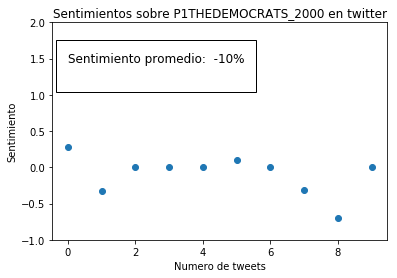

In [35]:
#Dibujar grafica Sentimental
GraficarDatos(numeros_list,popularidad_list,numero)


In [17]:
graph = relaciones_network()
numNodes = len(graph.node())

numEdges = len(graph.edges())
list(nx.chain_decomposition(graph))

[[('TheDemocrats', 'improv__nation'),
  ('improv__nation', 'DickDurbin'),
  ('DickDurbin', 'NerdetteAngle'),
  ('NerdetteAngle', 'TheDemocrats')],
 [('TheDemocrats', 'scottmcallstair'), ('scottmcallstair', 'DickDurbin')],
 [('TheDemocrats', 'sixbennetts'),
  ('sixbennetts', 'realDonaldTrump'),
  ('realDonaldTrump', 'theurban_guru'),
  ('theurban_guru', 'TheDemocrats')],
 [('TheDemocrats', 'PhloatinDave'),
  ('PhloatinDave', 'GOP'),
  ('GOP', 'sixbennetts')],
 [('TheDemocrats', 'ScribbledPages1'), ('ScribbledPages1', 'realDonaldTrump')]]

In [14]:
list(nx.bridges(graph))

True

In [19]:
bb = nx.edge_betweenness_centrality(graph, normalized=False)
nx.set_edge_attributes(graph, bb, 'betweenness')
print(graph.edges)
graph.edges['daby0729', 'nancyrutas']

[('daby0729', 'nancyrutas'), ('daby0729', 'RepAlGreen'), ('daby0729', 'TheDemocrats'), ('deplorable_LS', 'TheDemocrats'), ('NerdetteAngle', 'TheDemocrats'), ('NerdetteAngle', 'DickDurbin'), ('improv__nation', 'TheDemocrats'), ('improv__nation', 'DickDurbin'), ('scottmcallstair', 'TheDemocrats'), ('scottmcallstair', 'DickDurbin'), ('theurban_guru', 'Jali_Cat'), ('theurban_guru', 'realDonaldTrump'), ('theurban_guru', 'HouseGOP'), ('theurban_guru', 'SenateGOP'), ('theurban_guru', 'DNC'), ('theurban_guru', 'TheDemocrats'), ('sixbennetts', 'TheDemocrats'), ('sixbennetts', 'GOP'), ('sixbennetts', 'realDonaldTrump'), ('ScribbledPages1', 'Westxgal'), ('ScribbledPages1', 'TheDemocrats'), ('ScribbledPages1', 'realDonaldTrump'), ('ihvurbk2', 'TheDemocrats'), ('PhloatinDave', 'JoeZwier'), ('PhloatinDave', 'sjshelton91'), ('PhloatinDave', 'UnitersCentrist'), ('PhloatinDave', 'TheDemocrats'), ('PhloatinDave', 'GOP')]


{'weight': 1, 'sentiment': 0.2857142857142857, 'betweenness': 23.0}

In [20]:
centrality = nx.eigenvector_centrality(graph)
for node in centrality:
    print(centrality[node],node)


0.1885923785255244 daby0729
0.16089636145130512 deplorable_LS
0.20635198576205208 NerdetteAngle
0.20635198576205208 improv__nation
0.20635198576205208 scottmcallstair
0.3117260745532819 theurban_guru
0.2577898478780745 sixbennetts
0.2376119685465177 ScribbledPages1
0.16089636145130512 ihvurbk2
0.2546103887258686 PhloatinDave
0.051104156208041665 nancyrutas
0.051104156208041665 RepAlGreen
0.5937612969246018 TheDemocrats
0.16774905879206578 DickDurbin
0.08447185068598442 Jali_Cat
0.218715395324007 realDonaldTrump
0.08447185068598442 HouseGOP
0.08447185068598442 SenateGOP
0.08447185068598442 DNC
0.13884989092488012 GOP
0.06438782116795189 Westxgal
0.06899416745480899 JoeZwier
0.06899416745480899 sjshelton91
0.06899416745480899 UnitersCentrist


In [21]:
nx.clustering(graph)

{'daby0729': 0,
 'deplorable_LS': 0,
 'NerdetteAngle': 0,
 'improv__nation': 0,
 'scottmcallstair': 0,
 'theurban_guru': 0,
 'sixbennetts': 0,
 'ScribbledPages1': 0,
 'ihvurbk2': 0,
 'PhloatinDave': 0,
 'nancyrutas': 0,
 'RepAlGreen': 0,
 'TheDemocrats': 0,
 'DickDurbin': 0,
 'Jali_Cat': 0,
 'realDonaldTrump': 0,
 'HouseGOP': 0,
 'SenateGOP': 0,
 'DNC': 0,
 'GOP': 0,
 'Westxgal': 0,
 'JoeZwier': 0,
 'sjshelton91': 0,
 'UnitersCentrist': 0}

In [56]:
print(nx.attribute_assortativity_coefficient(graph,'sentiment'))

-0.3937777777777777


In [22]:
#Comunidades 
c = list(greedy_modularity_communities(graph))

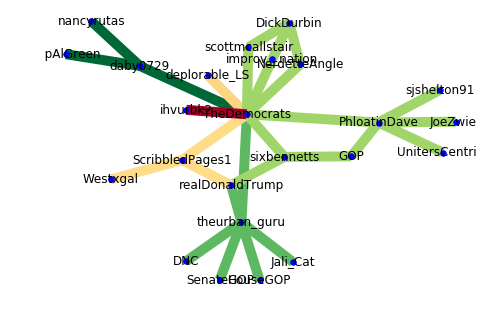

In [68]:
edges,weights = zip(*nx.get_edge_attributes(graph,'sentiment').items())
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color='b', node_size=30 ,edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.RdYlGn, with_labels = True)

In [71]:
 def getAllDataFromUserName(name):
    return df.loc[df['screen_name'] == name]

In [119]:
#Comunidad c[1]
#print(len(c))
print(c[0])

sentiment = []
for i in range(len(c)):
    for usuario in c[i]:
        var = getAllDataFromUserName(usuario)['sentiment'].tolist()
        if len(var)>0:
            sentiment.append(var[0])
        else:
            sentiment.append(0)
    print(sum(sentiment)/len(sentiment))


frozenset({'scottmcallstair', 'NerdetteAngle', 'DickDurbin', 'improv__nation', 'ihvurbk2', 'TheDemocrats', 'deplorable_LS'})
-0.1464285714285714
-0.07708333333333332
-0.07279411764705881
-0.05892857142857142
-0.039657738095238086


In [158]:
for a,b in zip(graph.edges(), c[0]):
    elGrafo = graph.edges(b,data=True)
    for ldata in elGrafo:
        for var1,var2, var3 in ldata:
            print(var3)
    #color=nx.get_edge_attributes(elGrafo,'sentiment')
    ldaMethod(data, 10)

ValueError: too many values to unpack (expected 3)

In [118]:
sentimientoEdges = []
for var1, var2, var3 in graph.edges(data=True):
    sentimientoEdges.append(var3['sentiment'])
print(sum(sentimientoEdges)/len(graph.edges))

-0.0180484693877551


In [60]:
r=nx.degree_assortativity_coefficient(graph)

d=nx.average_neighbor_degree(graph, source='in', target='in')

print(r)
print ('\n')
print (d)


-0.3352654459228032


{'daby0729': 4.0, 'deplorable_LS': 10.0, 'NerdetteAngle': 6.5, 'improv__nation': 6.5, 'scottmcallstair': 6.5, 'theurban_guru': 2.8333333333333335, 'sixbennetts': 5.0, 'ScribbledPages1': 4.666666666666667, 'ihvurbk2': 10.0, 'PhloatinDave': 3.0, 'nancyrutas': 3.0, 'RepAlGreen': 3.0, 'TheDemocrats': 2.8, 'DickDurbin': 2.0, 'Jali_Cat': 6.0, 'realDonaldTrump': 4.0, 'HouseGOP': 6.0, 'SenateGOP': 6.0, 'DNC': 6.0, 'GOP': 4.0, 'Westxgal': 3.0, 'JoeZwier': 5.0, 'sjshelton91': 5.0, 'UnitersCentrist': 5.0}


In [61]:
a=nx.degree(graph)
print(a)

[('daby0729', 3), ('deplorable_LS', 1), ('NerdetteAngle', 2), ('improv__nation', 2), ('scottmcallstair', 2), ('theurban_guru', 6), ('sixbennetts', 3), ('ScribbledPages1', 3), ('ihvurbk2', 1), ('PhloatinDave', 5), ('nancyrutas', 1), ('RepAlGreen', 1), ('TheDemocrats', 10), ('DickDurbin', 3), ('Jali_Cat', 1), ('realDonaldTrump', 3), ('HouseGOP', 1), ('SenateGOP', 1), ('DNC', 1), ('GOP', 2), ('Westxgal', 1), ('JoeZwier', 1), ('sjshelton91', 1), ('UnitersCentrist', 1)]


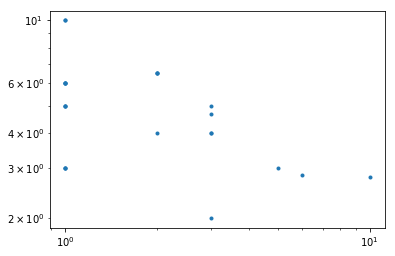

In [62]:
x = []
for lista, listb in a:
    x.append(listb)

    
y = d.values()

    
#x = a.values()
#y = d.values()

plt.loglog(x,y, '.')

plt.show()

FIN NETWORK X


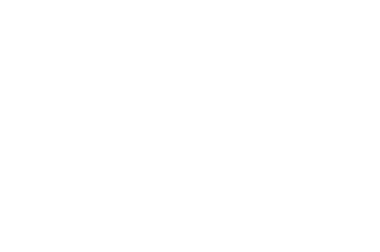

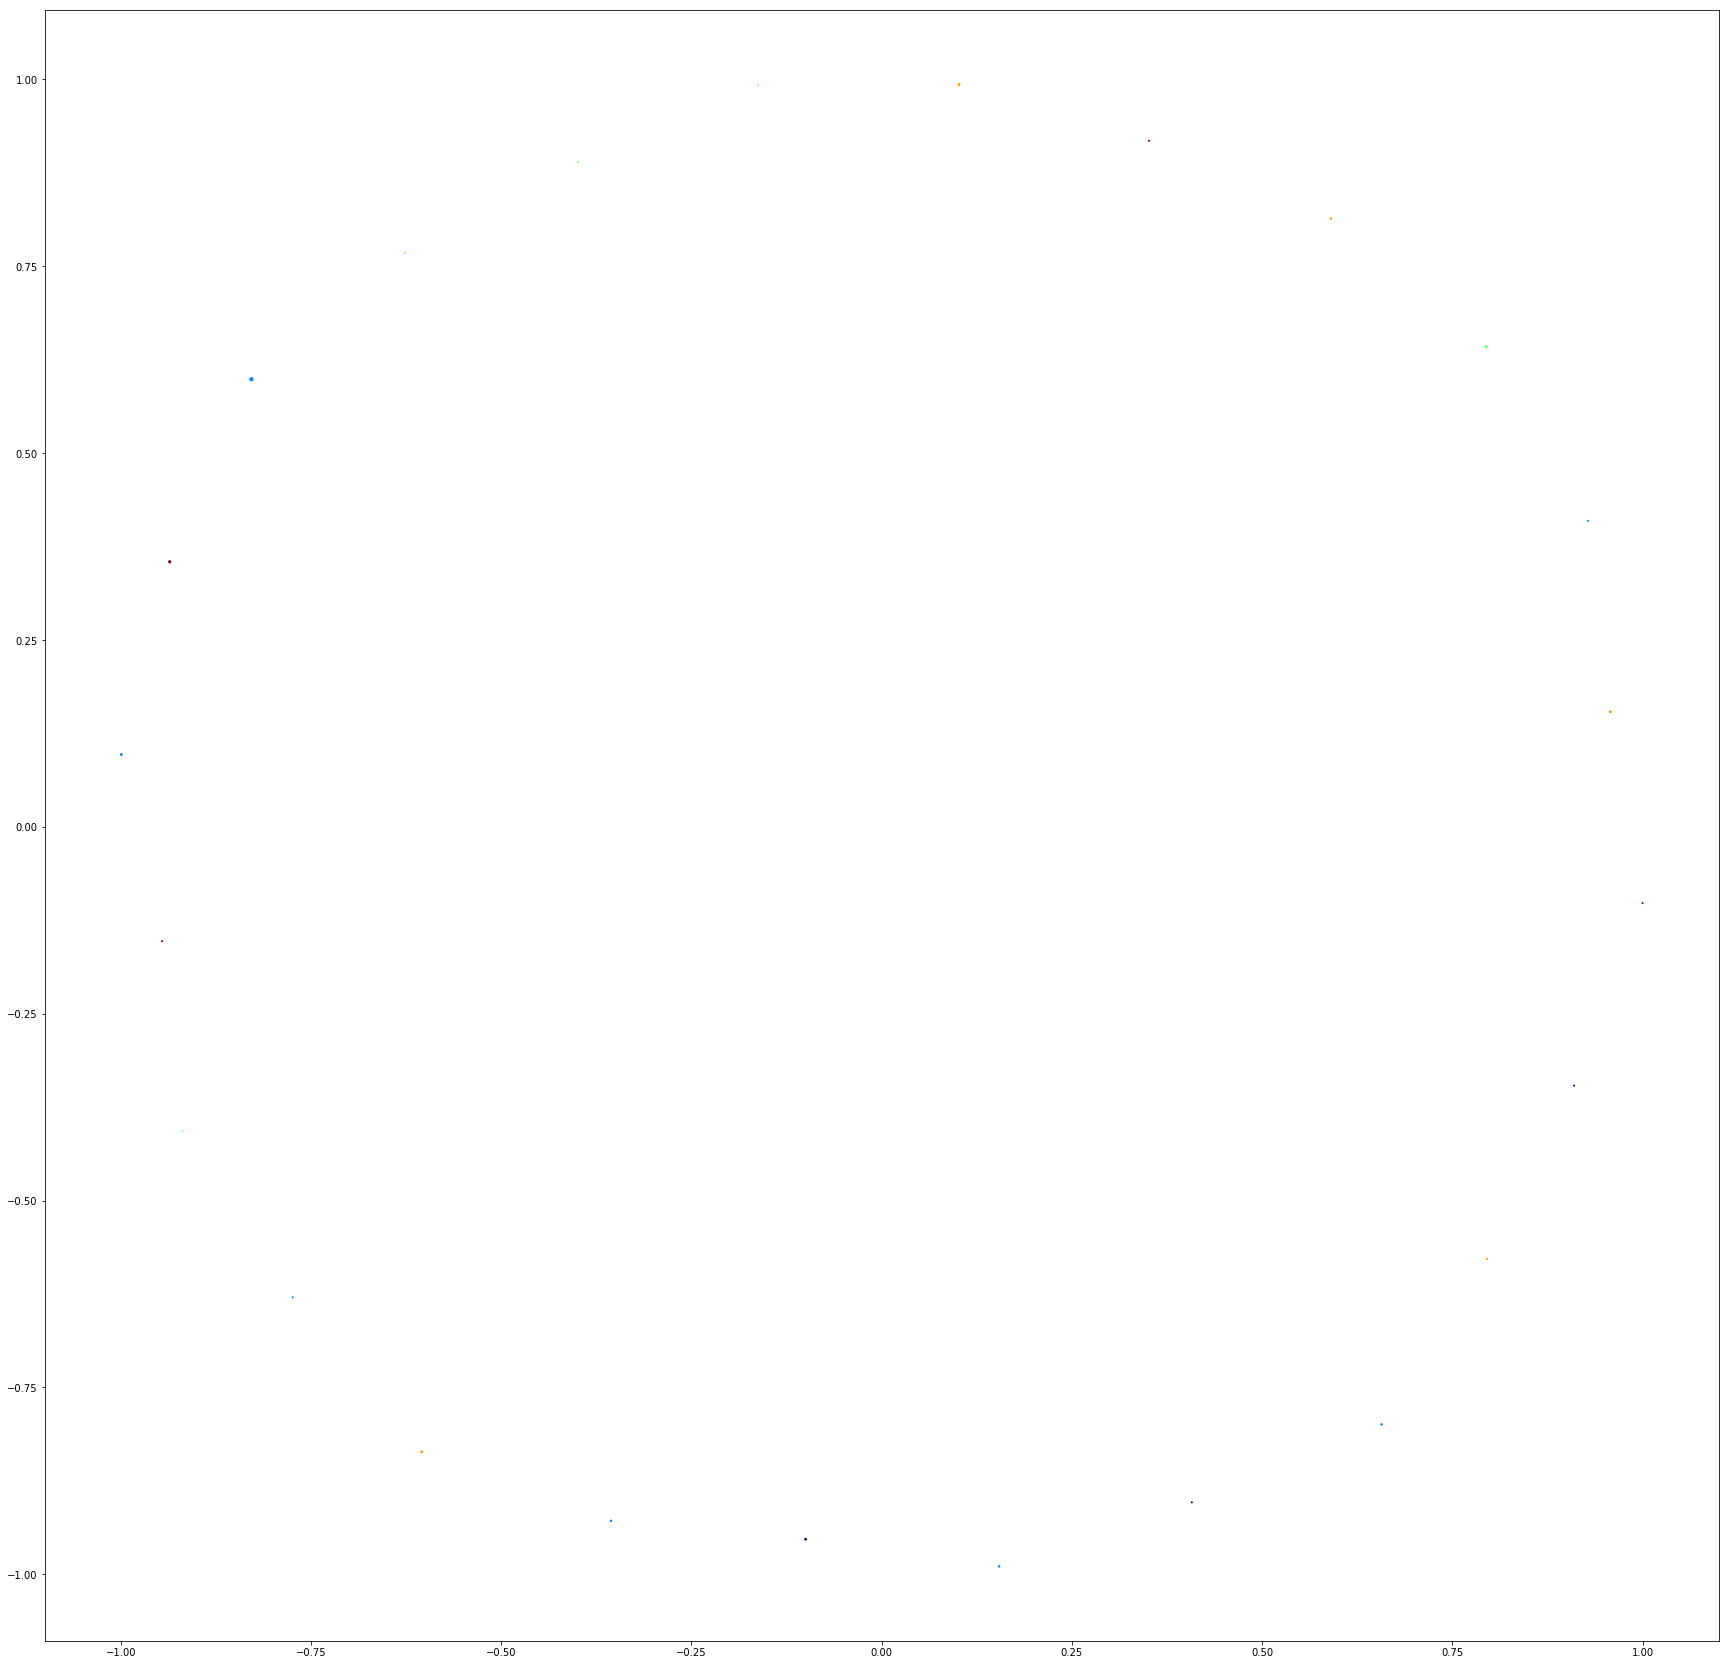

In [63]:

graph = graph.to_undirected()
spring_pos = nx.spring_layout(graph,k=100, iterations=150)
parts = community.best_partition(graph)
values = [parts.get(node) for node in graph.nodes()]
plt.axis("off")
plt.figure(figsize=(30,30))
size_node = [val for (node, val) in graph.degree()]
nx.draw_networkx(graph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = size_node, with_labels = False, edge_color="white")
#nx.draw(graph)
#nx.write_graphml(graph,"networkX.graphml",prettyprint=True)
#plt.show()
print ("FIN NETWORK X")

In [161]:
def tweet_clean(tweet):
    print('Original tweet:', tweet, '\n')
    tweet = str(tweet)
    # Remove HTML special entities (e.g. &amp;)
    tweet_no_special_entities = re.sub(r'\&\w*;', '', tweet)
    tweet_no_special_entities = re.sub(r'\@\w*;', '', tweet)
    #print('No special entitites:', tweet_no_special_entities, '\n')
    # Remove tickers
    tweet_no_tickers = re.sub(r'\$\w*', '', tweet_no_special_entities)
    #print('No tickers:', tweet_no_tickers, '\n')
    # Remove hyperlinks
    tweet_no_hyperlinks = re.sub(r'https?:\/\/.*\/\w*', '', tweet_no_tickers)
    #print('No hyperlinks:', tweet_no_hyperlinks, '\n')
    # Remove hashtags
    tweet_no_hashtags = re.sub(r'#\w*', '', tweet_no_hyperlinks)
    #print('No hashtags:', tweet_no_hashtags, '\n')
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet_no_punctuation = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet_no_hashtags)
    #print('No punctuation:', tweet_no_punctuation, '\n')
    # Remove https
    tweet_no_https = re.sub(r'https', '', tweet_no_punctuation)
    tweet_no_https = re.sub(r'http', '', tweet_no_punctuation)
    #print('No https:', tweet_no_https, '\n')
    # Remove words with 2 or fewer letters
    tweet_no_small_words = re.sub(r'\b\w{1,2}\b', '', tweet_no_https)
    #print('No small words:', tweet_no_small_words, '\n')
    # Remove whitespace (including new line characters)
    tweet_no_whitespace = re.sub(r'\s\s+', ' ', tweet_no_small_words) 
    tweet_no_whitespace = tweet_no_whitespace.lstrip(' ') # Remove single space remaining at the front of the tweet.
    #print('No whitespace:', tweet_no_whitespace, '\n')
	# Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    # tweet_no_emojis = ''.join(c for c in tweet_no_whitespace if c <= '\uFFFF') # Apart from emojis (plane 1), this also removes historic scripts and mathematical alphanumerics (also plane 1), ideographs (plane 2) and more.
    # #print('No emojis:', tweet_no_whitespace, '\n')
    # Tokenize: Change to lowercase, reduce length and remove handles
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True) # reduce_len changes, for example, waaaaaayyyy to waaayyy.
    tw_list = tknzr.tokenize(tweet_no_whitespace)
    #print('Tweet tokenize:', tw_list, '\n')
    # Remove stopwords
    list_no_stopwords = [i for i in tw_list if i not in english_stopwords]
    #print('No stop words:', list_no_stopwords, '\n')
    # 

    # Final filtered tweet
    tweet_filtered =' '.join(list_no_stopwords)

    print ('Final tweet: ', tweet_filtered)
    
    return(tweet_filtered)

In [159]:
def ldaMethod(data,topics ):
    global corpus, elDictionary, ldaResult, modelLDA
    tokenizer = RegexpTokenizer(r'\w+')

    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()

    # list for tokenized twiits in loop
    palabras = []
    for i in data:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(word) for word in tokens]
        
        # add tokens to list
        palabras.append(stemmed_tokens)
        # twit tokenizado en documento 
    elDictionary = corpora.Dictionary(palabras)

    #token en document-termino matriz
    corpus = [elDictionary.doc2bow(text) for text in palabras]
    
    # Generacion LDA
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topics, id2word = elDictionary, passes=20)
    modelLDA = ldamodel
    print ("LDA")
    ldaResult = ldamodel.print_topics(5)
    print (ldaResult)

    print ("PERPLEXITY")
    print (ldamodel.log_perplexity(corpus))

    coherence_model_lda = CoherenceModel(model=ldamodel, texts=palabras, dictionary=elDictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    print ("COHERENCE:" )
    print (coherence_lda)

In [160]:
def hlda(corpus, eldictionary, topic, probably_words):
    hdp = HdpModel(corpus, eldictionary)
    topic_info = hdp.print_topics(num_topics=20, num_words=10)
    print (topic_info)

In [ ]:
# LDA
print ("LDA START:")
#ldaMethod(Twits , Numero de topics)
ldaMethod(data, 10)
print ("LDA DONE:")

In [ ]:
# HLDA
print ("HLDA START:")
# def hlda(token en document-termino matriz, dictionary(seed), num_topics, most_probably_words):
hlda(corpus, elDictionary, 10, 50)
print ("HLDA DONE:")


In [ ]:
def graficModeLDA():
    probabilidad_del_topic = []
    print (ldaResult)
    for key,val in ldaResult:
        val = re.findall(r'\d*\.\d*',val)
        val = [i.encode('ascii', 'ignore') for i in val]
        a = 0
        for i in val:
            a+=float(i)

        probabilidad_del_topic.append((key,a))

    print (probabilidad_del_topic)
    d = elDictionary
    c = corpus
    lda = modelLDA
    data = pyLDAvis.gensim.prepare(lda, c, d)
    data
    
graficModeLDA